In [234]:
import sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv('data.csv')
#day of week, time, temperature, humidity, light on/off, aircon on/off, aircon temp, room, class
data.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]
data.head()

,day,hour,minute,temperature,humidity,light_state,aircon_state,aircon_temp,room,class
0,0,0,10,28.86,94.22,0,1,25,testRoom,wddh
1,0,0,20,32.30,80.88,0,1,27,testRoom,wddh
2,0,0,30,29.93,78.75,0,0,23,testRoom,wddc
3,0,0,40,32.09,83.99,1,1,27,testRoom,wdnh
4,0,0,50,28.24,95.64,0,1,29,testRoom,wddh


In [256]:
Y = data['class']
X = data.drop(["room","class"], axis=1)
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=100)
clf = DecisionTreeClassifier(criterion='entropy',random_state = 100, max_depth=10, min_samples_leaf=100)
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X_train,Y_train)
#clf = clf.fit(X,Y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
x = [[6,9,50,21,23.68,0,0,24]]
print(X_test)
prediction = knn.predict(X_test)
print(prediction)

['wddc' 'wddh' 'wddh' ... 'wddh' 'wedh' 'wddh']


[Text(0.4314516129032258, 0.9444444444444444, 'light_state <= 0.5\nentropy = 2.555\nsamples = 4031\nvalue = [907, 338, 364, 1270, 49, 66, 450, 587]\nclass = wdnh'),
 Text(0.1935483870967742, 0.8333333333333334, 'day <= 4.5\nentropy = 1.274\nsamples = 1360\nvalue = [907, 338, 0, 0, 49, 66, 0, 0]\nclass = wdnh'),
 Text(0.16129032258064516, 0.7222222222222222, 'hour <= 9.5\nentropy = 0.844\nsamples = 1245\nvalue = [907, 338, 0, 0, 0, 0, 0, 0]\nclass = wdnh'),
 Text(0.0967741935483871, 0.6111111111111112, 'hour <= 8.5\nentropy = 0.375\nsamples = 221\nvalue = [16, 205, 0, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.06451612903225806, 0.5, 'entropy = 0.183\nsamples = 108\nvalue = [3, 105, 0, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.12903225806451613, 0.5, 'entropy = 0.515\nsamples = 113\nvalue = [13, 100, 0, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.22580645161290322, 0.6111111111111112, 'hour <= 17.5\nentropy = 0.557\nsamples = 1024\nvalue = [891, 133, 0, 0, 0, 0, 0, 0]\nclass = wdnh'),
 Text(0.19

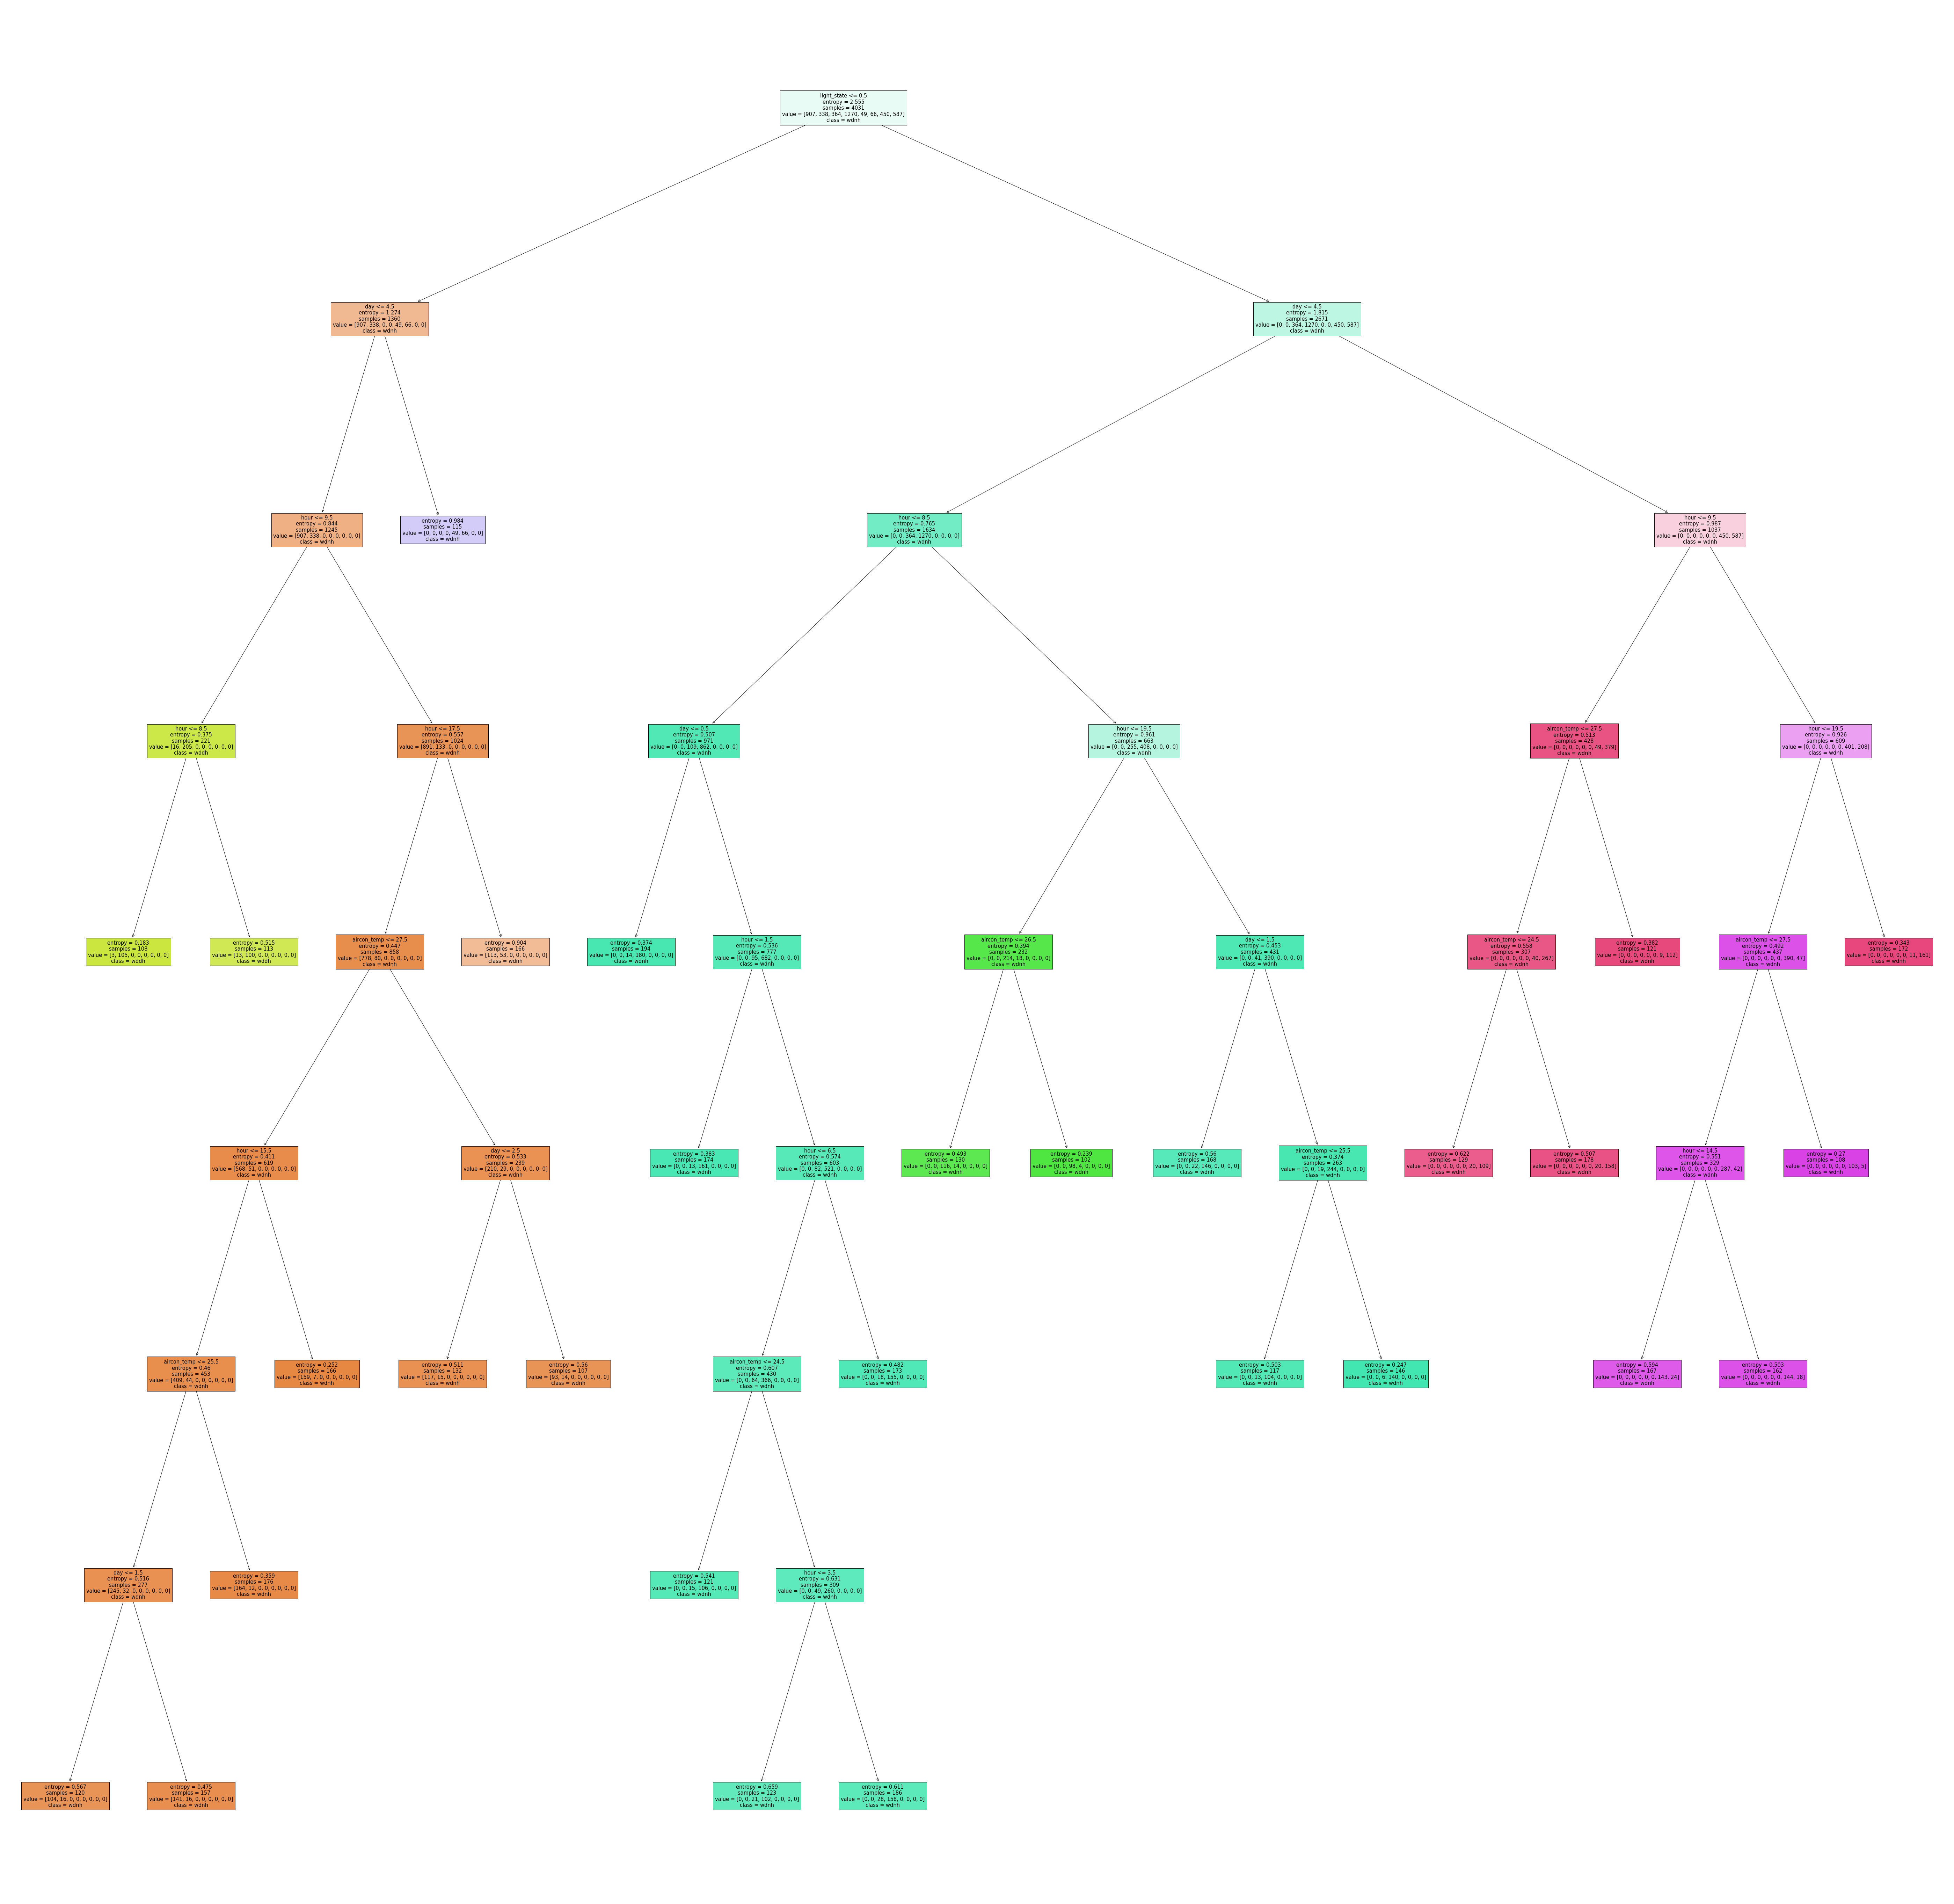

In [233]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(100,100))
tree.plot_tree(clf,feature_names=X.columns,class_names=Y,filled=True, impurity=True)

[Text(0.5, 0.875, 'X[5] <= 0.5\ngini = 0.754\nsamples = 2821\nvalue = [766, 1043, 106, 109, 303, 400, 40, 54]'),
 Text(0.25, 0.625, 'X[0] <= 4.5\ngini = 0.532\nsamples = 1215\nvalue = [766, 0, 106, 0, 303, 0, 40, 0]'),
 Text(0.125, 0.375, 'X[4] <= 0.5\ngini = 0.214\nsamples = 872\nvalue = [766, 0, 106, 0, 0, 0, 0, 0]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 766\nvalue = [766, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 106\nvalue = [0, 0, 106, 0, 0, 0, 0, 0]'),
 Text(0.375, 0.375, 'X[4] <= 0.5\ngini = 0.206\nsamples = 343\nvalue = [0, 0, 0, 0, 303, 0, 40, 0]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 303\nvalue = [0, 0, 0, 0, 303, 0, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 0, 0, 0, 0, 40, 0]'),
 Text(0.75, 0.625, 'X[0] <= 4.5\ngini = 0.51\nsamples = 1606\nvalue = [0, 1043, 0, 109, 0, 400, 0, 54]'),
 Text(0.625, 0.375, 'X[4] <= 0.5\ngini = 0.171\nsamples = 1152\nvalue = [0, 1043, 0, 109, 0, 0, 0, 0]'),
 Text(0.5625, 0.125

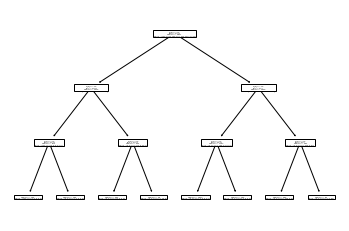

In [157]:
tree.plot_tree(clf)

# Clean up

In [68]:
data = data.drop(columns=["room"])
data.head()

,day,hour,minute,temperature,humidity,light_state,aircon_state,aircon_temp,class
0,0,0,10,33.81,83.21,0,1,27,wddh
1,0,0,20,27.32,85.62,0,1,27,wddh
2,0,0,30,31.08,91.14,0,1,28,wddh
3,0,0,40,33.91,88.28,0,1,24,wddh
4,0,0,50,27.62,94.32,0,1,25,wddh


In [69]:
data['class'] = data['class'].astype('category')
data.describe(include='category')
print(data["class"].unique())

i= 0
for unique in data["class"].unique():
    i += 1
clusters = i
print(clusters)

['wddh', 'wddc', 'wdnh', 'wdnc', 'wedh', 'wenh', 'wedc', 'wenc']
Categories (8, object): ['wddc', 'wddh', 'wdnc', 'wdnh', 'wedc', 'wedh', 'wenc', 'wenh']
8


In [71]:
clustering_kmeans = KMeans(n_clusters=clusters)
data = data.drop(columns=["class"])
data['clusters'] = clustering_kmeans.fit_predict(data)

data.head(25)

,day,hour,minute,temperature,humidity,light_state,aircon_state,aircon_temp,clusters
0,0,0,10,33.81,83.21,0,1,27,5
1,0,0,20,27.32,85.62,0,1,27,4
2,0,0,30,31.08,91.14,0,1,28,4
3,0,0,40,33.91,88.28,0,1,24,2
4,0,0,50,27.62,94.32,0,1,25,2
5,0,1,0,29.77,93.48,0,1,23,5
6,0,1,10,30.73,78.77,0,1,23,5
7,0,1,20,28.58,89.14,0,0,24,4
8,0,1,30,28.17,71.91,0,1,27,4
9,0,1,40,33.87,78.89,0,1,26,2


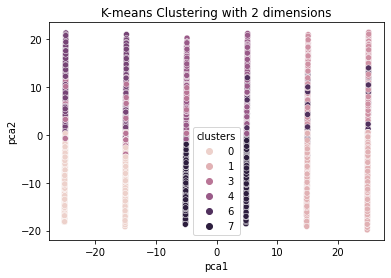

In [72]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
pca_num_components = 2
#data = data.drop(columns=["class"])
reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)

plt.title('K-means Clustering with 2 dimensions')
plt.show()

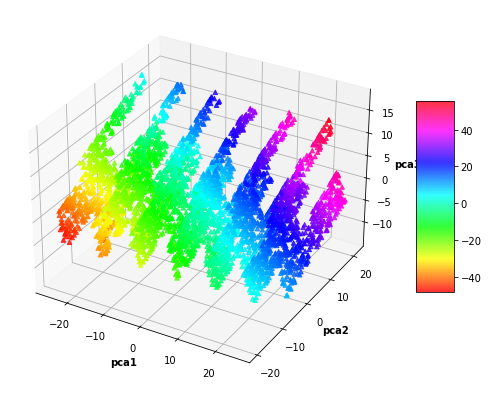

In [96]:
pca_num_components = 3
#data = data.drop(columns=["class"])
threedreduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(threedreduced_data,columns=['pca1','pca2','pca3'])

# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
sctt = ax.scatter3D(results["pca1"], results["pca2"], results["pca3"],
                    alpha = 0.8,
                    c = (results["pca1"] + results["pca2"] + results["pca3"]),
                    cmap = my_cmap,
                    marker ='^')
ax.set_xlabel('pca1', fontweight ='bold')
ax.set_ylabel('pca2', fontweight ='bold')
ax.set_zlabel('pca3', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()

In [102]:
from sklearn import tree

data = pd.read_csv('data.csv')
data.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]

Y = data['class']
X = data.drop(["room","class"], axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf = clf.fit(X,Y)

[Text(0.5, 0.875, 'day <= 4.5\nentropy = 2.172\nsamples = 4031\nvalue = [698, 1928, 79, 174, 277, 726, 41, 108]\nclass = wddh'),
 Text(0.25, 0.625, 'aircon_state <= 0.5\nentropy = 1.27\nsamples = 2879\nvalue = [698, 1928, 79, 174, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.125, 0.375, 'light_state <= 0.5\nentropy = 0.474\nsamples = 777\nvalue = [698, 0, 79, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 698\nvalue = [698, 0, 0, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 79\nvalue = [0, 0, 79, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.375, 0.375, 'light_state <= 0.5\nentropy = 0.412\nsamples = 2102\nvalue = [0, 1928, 0, 174, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 1928\nvalue = [0, 1928, 0, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 174\nvalue = [0, 0, 0, 174, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.75, 0.625, 'aircon_state <= 0.5\nentropy = 1.406\nsamples = 1

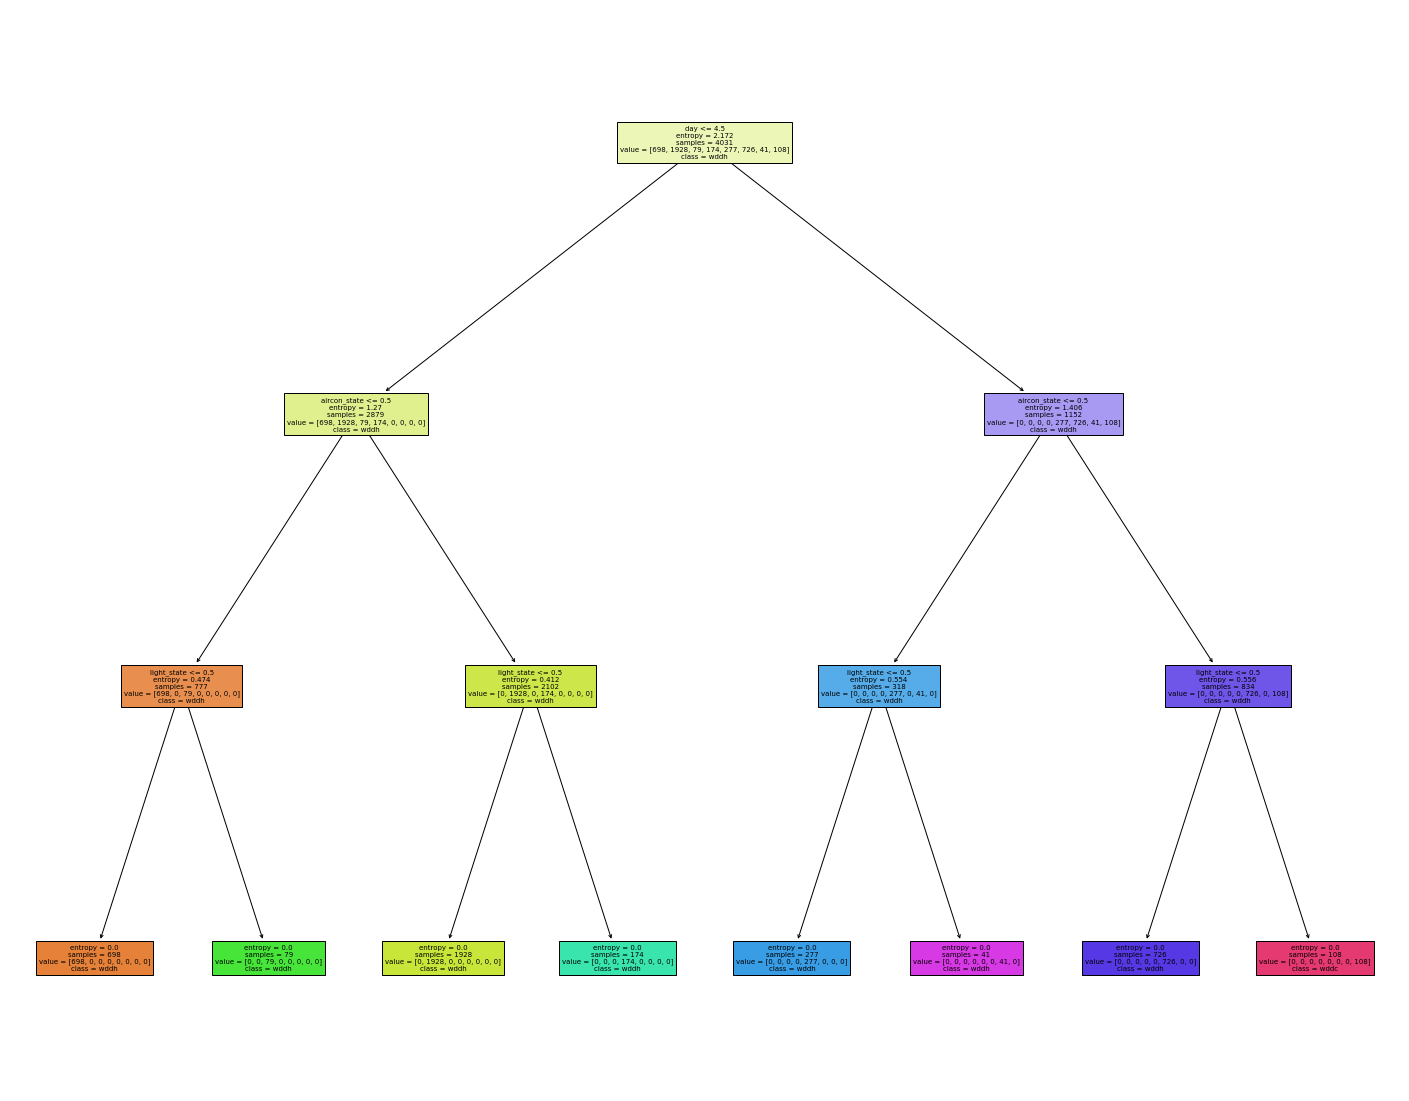

In [103]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=X.columns,class_names=Y,filled=True, impurity=True)